# Bayesian inference for all-nighters problem

#### Data model : Binomial
#### Prior : discrete

#### `목표` : 위의 setting에서 posterior distribution을 구해보자

In [1]:
# install.packages('ggplot2')

In [2]:
priorvalues = c(0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1)
priorprob = c(0, 0, .1, .1, .2, .2, .2, .1, .1, 0, 0)

n = 10
y = 7

$\operatorname{pr} (p|y) \propto \operatorname{pr}(p) \times \operatorname{pr}(y; n, p)$

> posterior distribution은 사전 확률과 sampling probability의 곱인 joint distribution에 비례한다.

In [3]:
#vector for storing results
jointprob = numeric(length = length(priorvalues)) # 0 0 0 0 0 0 0 0 0 0 0
for(i in 1:length(priorvalues)) {
    #compute binomial probability given value of p
    binomprob = dbinom(y, n, p = priorvalues[i])

    #compute joint probability
    jointprob[i] = binomprob * priorprob[i]
}

In [4]:
jointprob

[1] 0.0000000000 0.0000000000 0.0000786432 0.0009001692 0.0084934656
 [6] 0.0234375000 0.0429981696 0.0266827932 0.0201326592 0.0000000000
[11] 0.0000000000

$\operatorname{pr}(p|y) = \frac{\operatorname{pr}(p) \times \operatorname{pr}(y; n, p)} {p(y)}$

> posterior distribution은 joint distribution에 marginal prob을 나눠주면 된다.

In [5]:
#compute marginal probability of y
pofy = sum(jointprob)

#compute posterior probabilities
posteriorprob = jointprob/pofy

In [6]:
posteriorprob

[1] 0.0000000000 0.0000000000 0.0006408167 0.0073349435 0.0692081999
 [6] 0.1909782486 0.3503665120 0.2174222129 0.1640490664 0.0000000000
[11] 0.0000000000

사전 확률과 사후 확률을 비교하여 우리의 믿음이 어떻게 변했는 지 그리고 싶다.

`참고` : ggplot은 tidy한 dataset을 요구하므로 그 형태에 맞춰보자

In [7]:
library(tidyr)
allnighterposterior <- data.frame(p_candidate=priorvalues, prior=priorprob, posterior=posteriorprob)
allnighterposterior

p_candidate,prior,posterior
0.0,0.0,0.0000000000
0.1,0.0,0.0000000000
0.2,0.1,0.0006408167
0.3,0.1,0.0073349435
0.4,0.2,0.0692081999
0.5,0.2,0.1909782486
0.6,0.2,0.3503665120
0.7,0.1,0.2174222129
0.8,0.1,0.1640490664
0.9,0.0,0.0000000000


In [8]:
allnighterposterior <- allnighterposterior %>% gather(prob_type, probability, c('prior', 'posterior'))
allnighterposterior

p_candidate,prob_type,probability
0.0,prior,0.0000000000
0.1,prior,0.0000000000
0.2,prior,0.1000000000
0.3,prior,0.1000000000
0.4,prior,0.2000000000
0.5,prior,0.2000000000
0.6,prior,0.2000000000
0.7,prior,0.1000000000
0.8,prior,0.1000000000
0.9,prior,0.0000000000


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


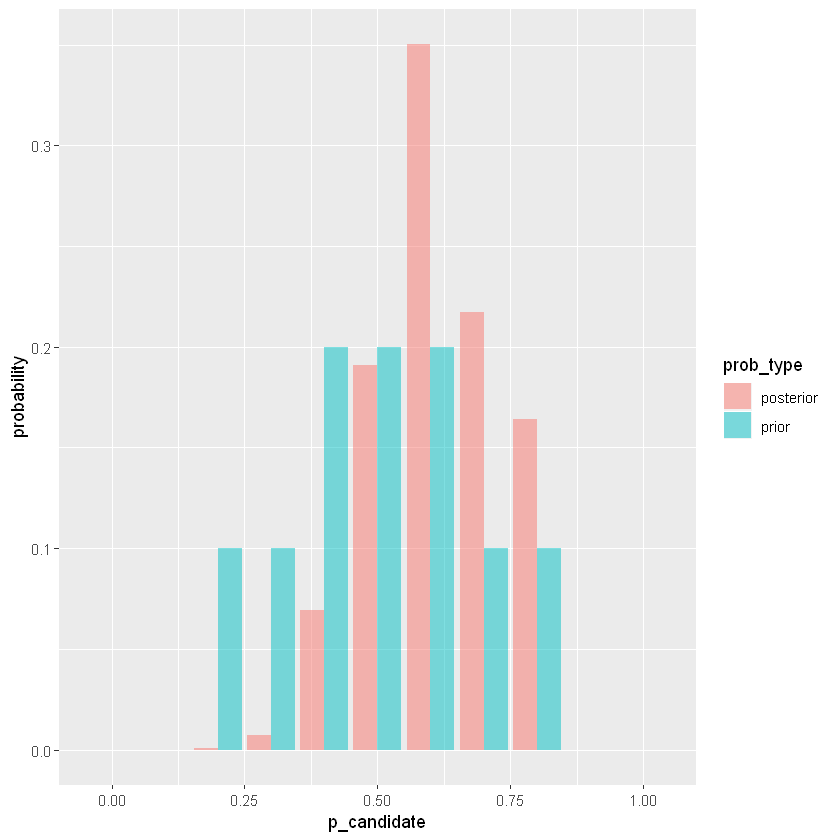

In [9]:
library(ggplot2)
ggplot(data=allnighterposterior, aes(x=p_candidate, y=probability, fill=prob_type)) + 
    geom_bar(stat='identity', alpha=0.5, position='dodge')